# PHAS2441 Session 6 Task:
# Normal modes of beads connected by springs

You are going to calculate the normal modes of vibration of a system of $N$ beads connected by $N+1$ Hookean springs to fixed end points. The beads are able to move horizontally but not vertically. This provides us with a basic but useful model of vibrations in a solid, where the beads represent atoms and the springs the interatomic bonds.

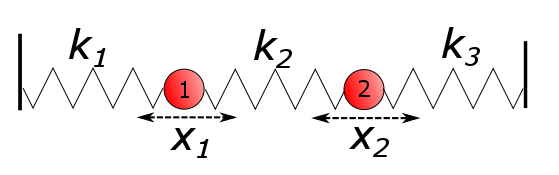

In [1]:
from IPython.display import Image # needed to embed an image
Image(filename='3springs2beads.png', embed=True)
# This image file is on Moodle. 
# It will appear here if you downloaded the image and it's in the same folder as this notebook!

First consider a system of just two beads, labelled 1 and 2, connected by three springs with spring constants $k_1$, $k_2$, $k_3$ to two fixed end points, as in the figure above. The displacement of each bead from its equilibrium position is given by $x_1$ and $x_2$, as shown. By considering each spring individually, we can see that the forces exerted by the springs are:

** Spring 1** exerts a force $-k_1 x_1$ on bead 1.

** Spring 2** exerts a force $-k_2(x_1 - x_2)$ on bead 1 and a force $-k_2(x_2 - x_1)$ on bead 2.

** Spring 3** exerts a force $-k_3 x_2$ on bead 2.

We can then write the total forces on the beads in the form of a matrix equation:

$$
\mathbf{F} =-\mathbf{K}\cdot \mathbf{x} = -\begin{pmatrix}
    k_1 + k_2 & -k_2 \\
    -k_2 & k_2 + k_3 
  \end{pmatrix}
  \begin{pmatrix}
   x_1 \\ x_2 \end{pmatrix}
$$

This can easily be extended to a system of $N$ beads with $N+1$ springs, which gives us a [tridiagonal](http://en.wikipedia.org/wiki/Tridiagonal_matrix) matrix for the spring constants $k_i$:

$$ \mathbf{K} = 
\begin{pmatrix}
k_1 + k_2 & -k_2 & 0 &  & \ldots &  0  \\
-k_2 & k_2 + k_3 & -k_3 & & \ldots &0 \\
 0 & -k_3 & k_3 + k_4 & -k_4 & \ldots & 0 \\
\vdots &  & \ddots & & & \vdots \\
0 & 0 & \ldots &  & -k_N & k_N + k_{N+1} \\
\end{pmatrix}
$$

We also know that for a harmonic oscillator, the spring constants are related to the angular frequency by

$$ k = m \omega^2 $$

and hence when we represent this in matrix form, we have

$$ -\mathbf{K}\mathbf{x} = -m \omega^2\mathbf{x} $$

which is an eigenvalue equation of the form $\mathbf{A} \mathbf{x} = \lambda \mathbf{x}$, where the eigenvectors of the matrix $\mathbf{K}$ will give us the bead displacements for the normal modes of vibration, and the eigenvalues the angular frequency of that mode.

## Your task:

Complete this notebook by doing the following.
    
### 1. Construct the matrix $\mathbf{K}$. 
* *Hint 1a:* It may be easier to construct a one-dimensional vector of $k_i$ and then use the [np.diag](http://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html) function to construct the diagonal and off-diagonal elements of $\mathbf{K}$ separately. 
* *Hint 1b:* Look at the documentation for `np.diag` in the link above and note the optional argument `k` - this will help you construct the off-diagonal elements.
* *Hint 2:* It will be easier to debug this if you start with a small value of $N$, less than 5 or so.
* *Useful to know:* `np.set_printoptions` will allow you to pretty-print matrices on the screen, which is useful when you are testing and debugging. Try `np.set_printoptions(threshold=2000, linewidth=110,suppress=True)  `, which should work well for matrices when N<=25. Adjust the linewidth if you go above this and still want to view the whole matrix (may not work so well on smaller screens).
      
### 2. Find the eigenvalues and eigenvectors of $\mathbf{K}$.
* *Useful to know:* you may want to reset your `np.set_printoptions` in this cell, if you set it above. A good setting to try here is: `np.set_printoptions(threshold=100, precision=4)` - can you see what effect the "precision" setting has?


### 3. Calculate the angular frequency $\omega$ of each normal mode, and plot it as a function of the mode number.
* *Hint:* The first mode has mode number 1, not 0. You'll need to create a separate x-array going from 1 to N+1 to use to plot the array of angular frequencies correctly.

### 4. Plot the bead displacements as a function of bead number for each of the three lowest normal modes.
* *Useful to know:* <tt>plt.axhline(c='k',ls=':',lw=0.5)</tt> will plot a fine black dotted line at the zero-y-axis

In the first instance, calculate for a system of 25 identical beads with mass $m=1$ and identical springs each with spring constant $k_i = 1$ (_Yet another hint: [np.ones()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)_ )

Once you are satisfied that your solution is correct, rerun the notebook for a system of 25 identical beads connected by springs which each have a spring constant $k_i = i$, (_where "i" is the integer index of the array, NOT $\sqrt{-1}$!_) **This is the version that will be graded**.

If you have time (for interest, not graded), try calculating for a system where the strength of the springs alternate between weak and strong, or any other configuration you like!

Remember to use text cells to describe the maths/physics of what you're doing, and code comments to annotate the code.

## Your solution goes here:


Add text and code cells below to complete the task

First we import the modules we need to do calculations with matrices, numpy and linear algebra, and to plot graphs:

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

np.set_printoptions(threshold=2000, linewidth=110,suppress=True)

Then we set the dimension of the matrix we want to use, i.e. the number of beads we have. From this we generate the array of spring constants (in this case, ones) and a corresponding matrix, and populate the matrix with values.

In [9]:
N = 25 # set the number of beads
k = np.arange(1,N+2,1) # define the array of spring constants
#k = np.ones(N+1)
k_diag = -k[1:N+1]

matrixk = np.diag(k) + np.diag(k+1) + np.diag(k_diag,1) + np.diag(k_diag,-1)

print(matrixk)

[[  3  -2   0 ...,   0   0   0]
 [ -2   5  -3 ...,   0   0   0]
 [  0  -3   7 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,  49 -25   0]
 [  0   0   0 ..., -25  51 -26]
 [  0   0   0 ...,   0 -26  53]]


We then calculate the eigenvalues and eigenvectors for the matrix, to 4dp.

In [10]:
np.set_printoptions(threshold=100, precision=4)

eigval, eigvec = la.eigh(matrixk)
print("has eigenvalues \n", eigval)
print("and corresponding eigenvectors\n", eigvec)

has eigenvalues 
 [  0.1125   0.4719   1.0646   1.8755   2.8868   4.0831   5.457    7.0129   8.763   10.7205  12.8971  15.3037
  17.9526  20.8579  24.0367  27.5096  31.3021  35.4457  39.9807  44.9599  50.4542  56.5641  63.4405  71.3318
  80.7128  92.8026]
and corresponding eigenvectors
 [[-0.1485 -0.2769  0.3799 ..., -0.     -0.     -0.    ]
 [-0.2144 -0.35    0.3676 ...,  0.      0.      0.    ]
 [-0.2503 -0.3437  0.229  ..., -0.     -0.     -0.    ]
 ..., 
 [-0.0421  0.0835  0.1201 ..., -0.146  -0.0755  0.5422]
 [-0.0276  0.0554  0.0813 ..., -0.2206  0.3547 -0.5462]
 [-0.0136  0.0274  0.0407 ...,  0.3128 -0.3327  0.3568]]


These eigenvalues correspond to the values of $m\omega^2$; since m=1 we can take the square root to find $\omega$

In [11]:
frequency = np.sqrt(eigval)
print("The angluar frequencies are:", frequency)

The angluar frequencies are: [ 0.3355  0.687   1.0318  1.3695  1.6991  2.0207  2.336   2.6482  2.9602  3.2742  3.5913  3.912   4.237   4.567
  4.9027  5.245   5.5948  5.9536  6.323   6.7052  7.1031  7.5209  7.965   8.4458  8.984   9.6334]


We then plot angular frequency against the mode of vibration using matplotlib.

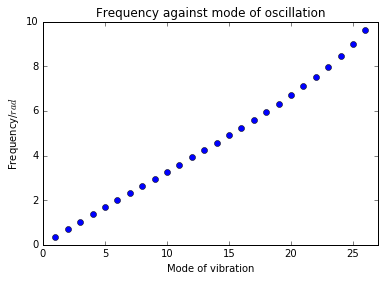

In [12]:
modes = np.arange(1,N+2,1)

plt.plot(modes,frequency, 'bo', label="Frequency varying with mode of oscillation")
plt.title('Frequency against mode of oscillation')
plt.xlim(0,N+2)
plt.xlabel("Mode of vibration")
plt.ylabel("Frequency/$rad~s^{-1}$")

The displacement of the beads is given by the eigenvector of the matrix, so we can plot the eigenvector against the mode number.

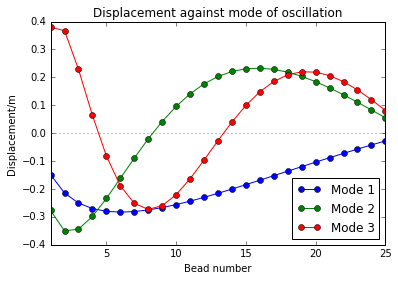

In [17]:
for i in range(3):
    plt.plot(modes,eigvec[:,i], 'o-', label="Mode {}".format(i+1))
#plt.plot(modes,eigvec, 'bo', label="Displacement against mode of vibration")
plt.axhline(c='k',ls=':',lw=0.5) # Creates a dashed line at zero displacement
plt.title('Displacement against mode of oscillation')
plt.xlim(1,25)
plt.xlabel("Bead number")
plt.ylabel("Displacement/m")
plt.legend(loc=0)

This is a standing wave modelling atoms in a one-dimensional solid.